**Модель Тейла-Вейджа (аддитивная, учитывает тренд и сезонность)**

In [ ]:
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 3.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from scipy.optimize import differential_evolution, minimize
import scipy

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/PDA-210')

In [ ]:
data=pd.read_excel('data.xls', sheet_name='Prices')
data.head()

,Unnamed: 0,Unnamed: 1,Рыночные цены на продукцию (руб.),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,NaN,NaN,2007-01-01 00:00:00,2007-02-01 00:00:00,2007-03-01 00:00:00,2007-04-01 00:00:00,2007-05-01 00:00:00,2007-06-01 00:00:00,2007-07-01 00:00:00,2007-08-01 00:00:00,...,2010-03-01 00:00:00,2010-04-01 00:00:00,2010-05-01 00:00:00,2010-06-01 00:00:00,2010-07-01 00:00:00,2010-08-01 00:00:00,2010-09-01 00:00:00,2010-10-01 00:00:00,2010-11-01 00:00:00,2010-12-01 00:00:00
1,№ организации,1.0,61.75,58.66,52.67,42.45,41.96,39.6,38.81,55.68,...,80.53,75.52,71.61,65.58,65.41,67.65,66.87,71.7,76.25,82.23
2,NaN,2.0,153.4,149.4,144.16,135.57,132.99,131.5,130.85,136.7,...,171.73,167.74,162.16,156.61,158.25,160.48,156.98,163.53,168.33,175.26
3,NaN,3.0,105.94,103.88,97.72,88.95,87.24,83.96,83.27,89.8,...,126.25,119.78,115.19,110.53,110.12,112.93,111.69,115.19,122.9,128.68
4,NaN,4.0,150.03,155.82,151.17,141.74,149.15,146.48,148.33,153.19,...,198.09,194.57,188.31,184.41,183.69,187.48,184.97,189.35,205.11,210.82


In [ ]:
dates =data.loc[data.index==0].values[0,2:]
val =data.loc[data.index==1].values[0,2:]

In [ ]:
data={'Date':dates,'Value':val}

In [ ]:
df=pd.DataFrame(data)
df.head()

,Date,Value
0,2007-01-01,61.75
1,2007-02-01,58.66
2,2007-03-01,52.67
3,2007-04-01,42.45
4,2007-05-01,41.96


In [ ]:
df=df.set_index('Date')
df.head()

,Value
Date,
2007-01-01,61.75
2007-02-01,58.66
2007-03-01,52.67
2007-04-01,42.45
2007-05-01,41.96


In [ ]:
df.info()

In [ ]:
df.Value = df.Value.astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2007-01-01 to 2010-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


In [ ]:
model=ExponentialSmoothing(df['Value'],seasonal='multiplicative',initialization_method="estimated").fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
y_pred=model.fittedvalues
y_pred.head()

Date
2007-01-01    61.684373
2007-02-01    60.666002
2007-03-01    55.188169
2007-04-01    49.090046
2007-05-01    39.494569
dtype: float64

In [ ]:
y=df['Value']
y.head()

Date
2007-01-01    61.75
2007-02-01    58.66
2007-03-01    52.67
2007-04-01    42.45
2007-05-01    41.96
Name: Value, dtype: float64

In [ ]:
MSE=mean_squared_error(y, y_pred)
MSE

8.328777250270774

In [ ]:
RMSE=sqrt(MSE)
RMSE

2.885962101322672

In [ ]:
y_new=model.predict(start=48, end=59)
y_new

2011-01-01    79.363852
2011-02-01    77.973308
2011-03-01    73.278014
2011-04-01    68.192748
2011-05-01    63.128282
2011-06-01    58.985814
2011-07-01    59.495124
2011-08-01    65.139421
2011-09-01    67.286467
2011-10-01    73.898654
2011-11-01    77.512462
2011-12-01    82.184528
Freq: MS, dtype: float64

In [ ]:
y_new=model.forecast(12)
y_new

2011-01-01    79.363852
2011-02-01    77.973308
2011-03-01    73.278014
2011-04-01    68.192748
2011-05-01    63.128282
2011-06-01    58.985814
2011-07-01    59.495124
2011-08-01    65.139421
2011-09-01    67.286467
2011-10-01    73.898654
2011-11-01    77.512462
2011-12-01    82.184528
Freq: MS, dtype: float64

In [ ]:
np.save('prices_new.npy',y_new)

In [ ]:
sigma=scipy.stats.sem(y)
sigma

1.585150526992775

In [ ]:
conf=0.95

In [ ]:
tstu=scipy.stats.t.ppf((1+conf)/2.,len(y)-1)
tstu

2.0117405104757546

In [ ]:
y_up=y_new+tstu*sigma
y_up

2011-01-01    82.552763
2011-02-01    81.162219
2011-03-01    76.466925
2011-04-01    71.381659
2011-05-01    66.317194
2011-06-01    62.174725
2011-07-01    62.684036
2011-08-01    68.328333
2011-09-01    70.475378
2011-10-01    77.087566
2011-11-01    80.701373
2011-12-01    85.373439
Freq: MS, dtype: float64

In [ ]:
np.save('prices_up.npy',y_up)

In [ ]:
y_down=y_new-tstu*sigma
y_down

2011-01-01    76.174940
2011-02-01    74.784396
2011-03-01    70.089102
2011-04-01    65.003836
2011-05-01    59.939371
2011-06-01    55.796902
2011-07-01    56.306213
2011-08-01    61.950510
2011-09-01    64.097555
2011-10-01    70.709743
2011-11-01    74.323550
2011-12-01    78.995616
Freq: MS, dtype: float64

In [ ]:
np.save('prices_down.npy',y_down)

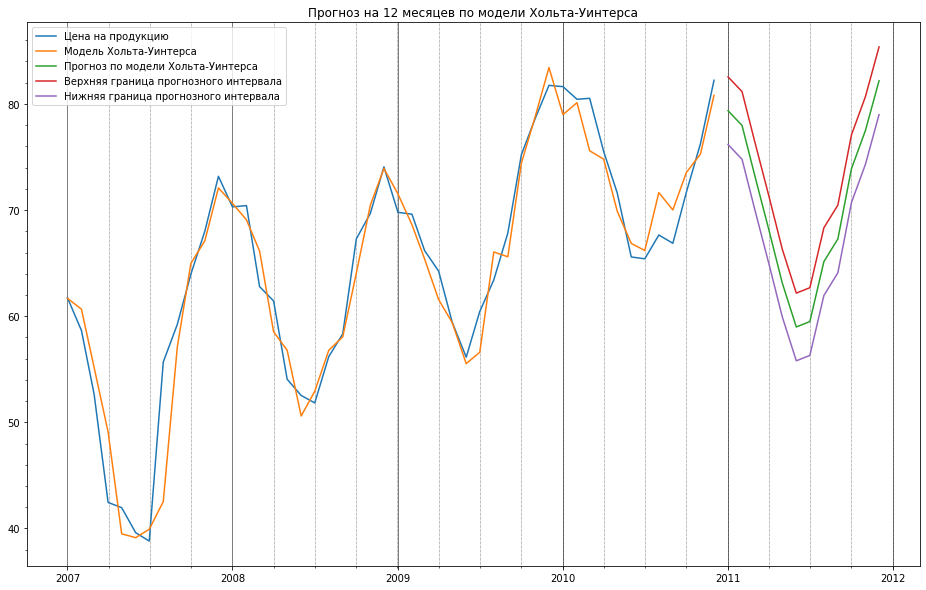

In [ ]:
fig, ax = plt.subplots(figsize = (16, 10))

ax.plot(df['Value'], label = 'Цена на продукцию')
ax.plot(y_pred, label = 'Модель Хольта-Уинтерса')
ax.plot(y_new, label = 'Прогноз по модели Хольта-Уинтерса')
ax.plot(y_up, label = 'Верхняя граница прогнозного интервала')
ax.plot(y_down, label = 'Нижняя граница прогнозного интервала')

ax.grid(which = 'major', axis = 'x', linestyle = '-', linewidth = '0.5', color = 'black')

ax.minorticks_on()

ax.grid(which = 'minor', axis = 'x', linestyle = ':', linewidth = '0.5', color = 'black')

ax.set_axisbelow(True)

ax.legend()

plt.title('Прогноз на 12 месяцев по модели Хольта-Уинтерса')

plt.show()

In [ ]:
model=ExponentialSmoothing(df['Value'],seasonal='additive',initialization_method="estimated").fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
y_pred=model.fittedvalues
y_pred.head()

Date
2007-01-01    61.577323
2007-02-01    60.282603
2007-03-01    54.208451
2007-04-01    47.822938
2007-05-01    38.445345
dtype: float64

In [ ]:
y=df['Value']
y.head()

Date
2007-01-01    61.75
2007-02-01    58.66
2007-03-01    52.67
2007-04-01    42.45
2007-05-01    41.96
Name: Value, dtype: float64

In [ ]:
MSE=mean_squared_error(y, y_pred)
MSE

6.945072785510576

In [ ]:
RMSE=sqrt(MSE)
RMSE

2.6353506001119804

In [ ]:
y_new=model.predict(start=48, end=59)
y_new

2011-01-01    79.143596
2011-02-01    77.692631
2011-03-01    73.086670
2011-04-01    68.093204
2011-05-01    63.577243
2011-06-01    59.908777
2011-07-01    60.205308
2011-08-01    66.449347
2011-09-01    68.413385
2011-10-01    74.522420
2011-11-01    77.776455
2011-12-01    82.057992
Freq: MS, dtype: float64

In [ ]:
y_new=model.forecast(12)
y_new

2011-01-01    79.143596
2011-02-01    77.692631
2011-03-01    73.086670
2011-04-01    68.093204
2011-05-01    63.577243
2011-06-01    59.908777
2011-07-01    60.205308
2011-08-01    66.449347
2011-09-01    68.413385
2011-10-01    74.522420
2011-11-01    77.776455
2011-12-01    82.057992
Freq: MS, dtype: float64

In [ ]:
np.save('prices_new.npy',y_new)

In [ ]:
sigma=scipy.stats.sem(y)
sigma

1.585150526992775

In [ ]:
conf=0.95

In [ ]:
tstu=scipy.stats.t.ppf((1+conf)/2.,len(y)-1)
tstu

2.0117405104757546

In [ ]:
y_up=y_new+tstu*sigma
y_up

2011-01-01    82.332508
2011-02-01    80.881543
2011-03-01    76.275581
2011-04-01    71.282116
2011-05-01    66.766154
2011-06-01    63.097688
2011-07-01    63.394220
2011-08-01    69.638259
2011-09-01    71.602296
2011-10-01    77.711332
2011-11-01    80.965367
2011-12-01    85.246903
Freq: MS, dtype: float64

In [ ]:
np.save('prices_up.npy',y_up)

In [ ]:
y_down=y_new-tstu*sigma
y_down

2011-01-01    75.954684
2011-02-01    74.503720
2011-03-01    69.897758
2011-04-01    64.904293
2011-05-01    60.388331
2011-06-01    56.719865
2011-07-01    57.016396
2011-08-01    63.260436
2011-09-01    65.224473
2011-10-01    71.333509
2011-11-01    74.587544
2011-12-01    78.869080
Freq: MS, dtype: float64

In [ ]:
np.save('prices_down.npy',y_down)

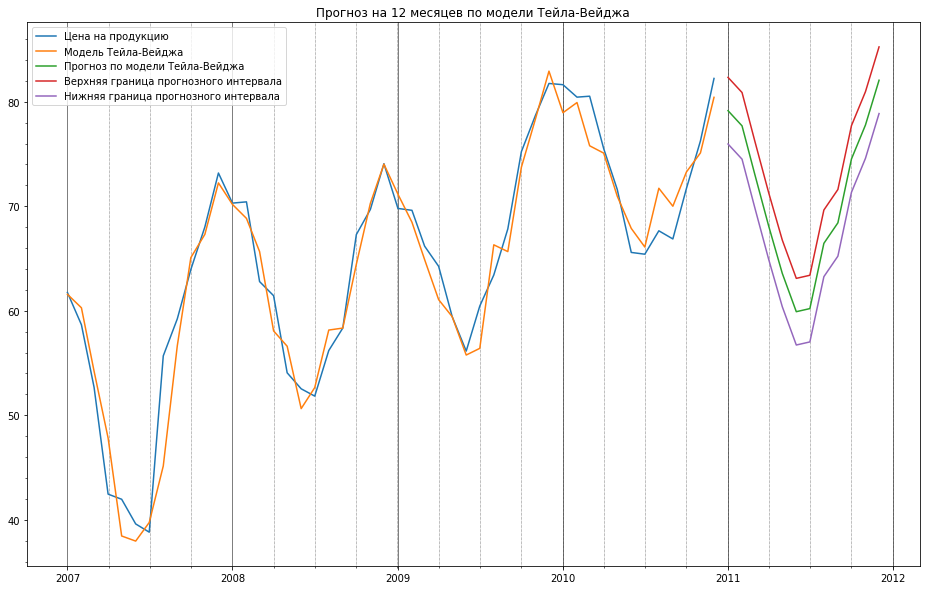

In [ ]:
fig, ax = plt.subplots(figsize = (16, 10))

ax.plot(df['Value'], label = 'Цена на продукцию')
ax.plot(y_pred, label = 'Модель Тейла-Вейджа')
ax.plot(y_new, label = 'Прогноз по модели Тейла-Вейджа')
ax.plot(y_up, label = 'Верхняя граница прогнозного интервала')
ax.plot(y_down, label = 'Нижняя граница прогнозного интервала')

ax.grid(which = 'major', axis = 'x', linestyle = '-', linewidth = '0.5', color = 'black')

ax.minorticks_on()

ax.grid(which = 'minor', axis = 'x', linestyle = ':', linewidth = '0.5', color = 'black')

ax.set_axisbelow(True)

ax.legend()

plt.title('Прогноз на 12 месяцев по модели Тейла-Вейджа')

plt.show()